# Importing Required Libraries

In [4]:
import os
import time
import warnings
import numpy as np
from numpy import newaxis
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

/Users/masi/.pyenv/versions/DL/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


# Importing the Dataset

In [5]:
#read the bitcoin price dataset
# dateparser = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
bitcoin_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/bitcoin_price.csv')
ethereum_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/ethereum_price.csv')
ripple_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/ripple_price.csv')
iota_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/iota_price.csv')
litecoin_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/litecoin_price.csv')
monero_price = pd.read_csv(filepath_or_buffer='cryptocurrencypricehistory/monero_price.csv')

In [6]:
currency_dict = {
    "bitcoin" : bitcoin_price,
    "ethereum" : ethereum_price,
    "ripple" : ripple_price,
    "iota" : iota_price,
    "litecoin" : litecoin_price,
    "monero" : monero_price
}

In [7]:
currency_dict["bitcoin"].head(5)

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Nov 07, 2017",7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
1,"Nov 06, 2017",7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2,"Nov 05, 2017",7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
3,"Nov 04, 2017",7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
4,"Nov 03, 2017",7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [8]:
bitcoin_data = currency_dict["bitcoin"][['Date', 'Close']]
ethereum_data = currency_dict["ethereum"][['Date', 'Close']]
ripple_data = currency_dict["ripple"][['Date', 'Close']]
iota_data = currency_dict["iota"][['Date', 'Close']]
litecoin_data = currency_dict["litecoin"][['Date', 'Close']]
monero_data = currency_dict["monero"][['Date', 'Close']]

In [9]:
currency_data = {
    "bitcoin" : bitcoin_data,
    "ethereum" : ethereum_data,
    "ripple" : ripple_data,
    "iota" : iota_data,
    "litecoin" : litecoin_data,
    "monero" : monero_data
}

In [10]:
currency_data['bitcoin'].head(5)

,Date,Close
0,"Nov 07, 2017",7144.38
1,"Nov 06, 2017",7022.76
2,"Nov 05, 2017",7407.41
3,"Nov 04, 2017",7379.95
4,"Nov 03, 2017",7207.76



# Data Exploration

In [11]:
#converting date format from string to datetime
# bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
for currency in currency_data:
    currency_data[currency].loc[0:, 'Date'] = pd.to_datetime(currency_data[currency]['Date'])
# bitcoin_data.loc[0:, 'Date'] = pd.to_datetime(bitcoin_data['Date'])

/Users/masi/.pyenv/versions/DL/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [12]:
bitcoin_data['Close'].dtypes

dtype('float64')

In [13]:
bitcoin_ts = currency_data['bitcoin'].set_index('Date')
ethereum_ts = currency_data['ethereum'].set_index('Date')
ripple_ts = currency_data['ripple'].set_index('Date')
iota_ts = currency_data['iota'].set_index('Date')
litecoin_ts = currency_data['litecoin'].set_index('Date')
monero_ts = currency_data['monero'].set_index('Date')

In [14]:
currency_time_series = {
    "bitcoin" : bitcoin_ts,
    "ethereum" : ethereum_ts,
    "ripple" : ripple_ts,
    "iota" : iota_ts,
    "litecoin" : litecoin_ts,
    "monero" : monero_ts,
}

In [15]:
bitcoin_ts.head(5)

,Close
Date,
2017-11-07,7144.38
2017-11-06,7022.76
2017-11-05,7407.41
2017-11-04,7379.95
2017-11-03,7207.76


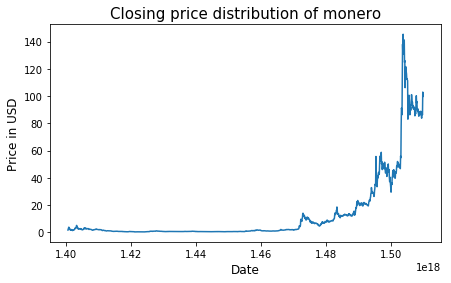

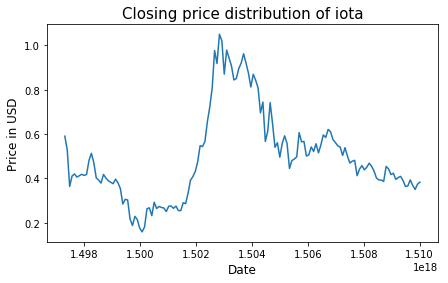

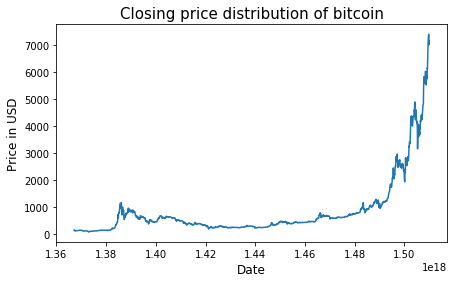

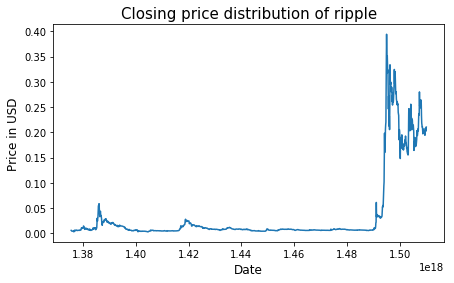

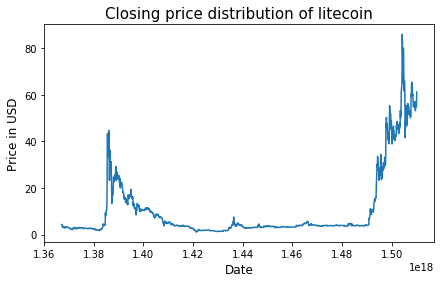

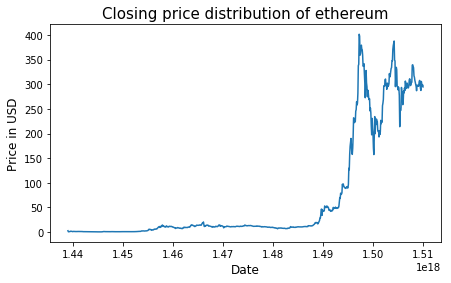

In [16]:
#Closing price visualization
for ts in currency_time_series:
#     plt.subplot(2, 2, 2)
#     plt.subplots(1, 2, figsize=(20, 4))
    fig, ax = plt.subplots(figsize=(7,4))
    plt.plot(currency_time_series[ts])
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    title_str = "Closing price distribution of " + ts
    plt.title(title_str, fontsize=15)
    plt.show()
#     plt.plot(currency_time_series[ts])


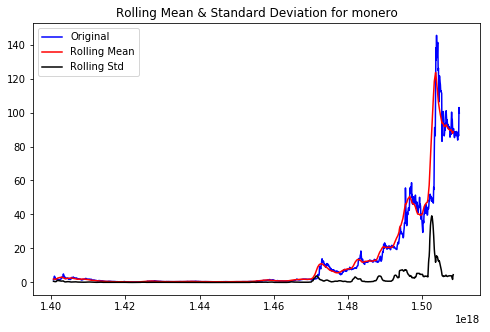

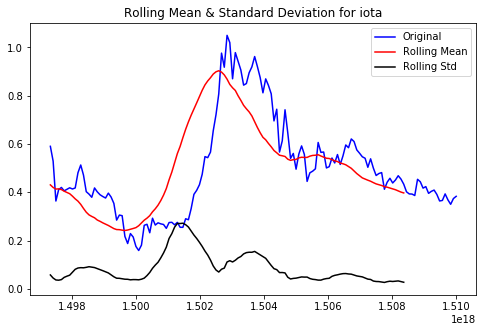

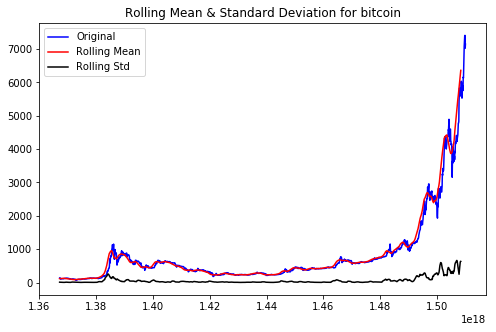

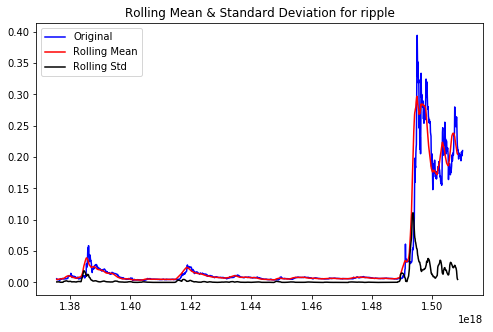

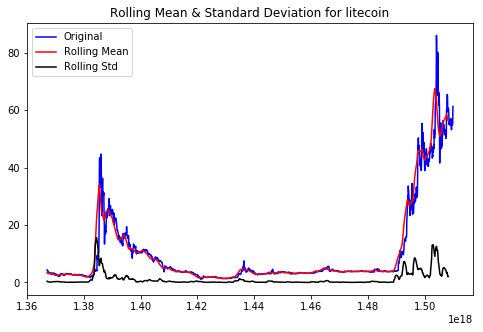

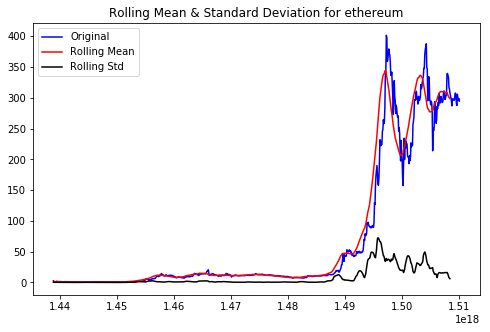

In [17]:
#Calculating rolling statistics to check for a trend/seasonality
for ts in currency_time_series:
    rolling_mean = currency_time_series[ts].rolling(window=20,center=False).mean()
    rolling_std = currency_time_series[ts].rolling(window=20,center=False).std()

    #Plot rolling statistics:
    fig, ax = plt.subplots(figsize=(8,5))
    orig = plt.plot(currency_time_series[ts], color='blue',label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation for ' + ts)
    plt.show(block=False)

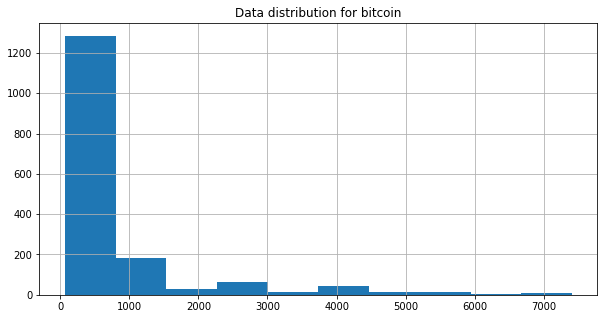

In [18]:
#Visualizing data distribution to check for Stationarity (bitcoin data used)
currency_time_series['bitcoin']['Close'].hist()
plt.title('Data distribution for bitcoin')
plt.show()

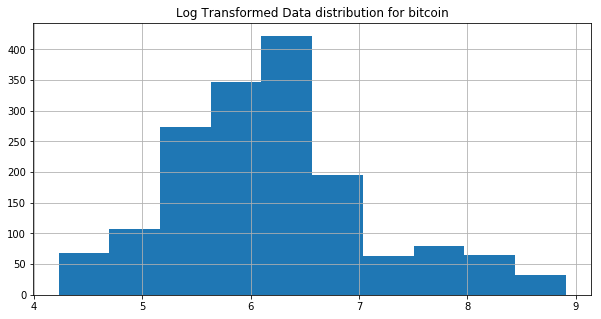

In [19]:
#transforming the data and checking for the Stationarity (bitcoin data used)
bitcoin_log = np.log(currency_time_series['bitcoin'])
bitcoin_log['Close'].hist()
plt.title('Log Transformed Data distribution for bitcoin')
plt.show()

## Correlation between different Crypto-Currencies

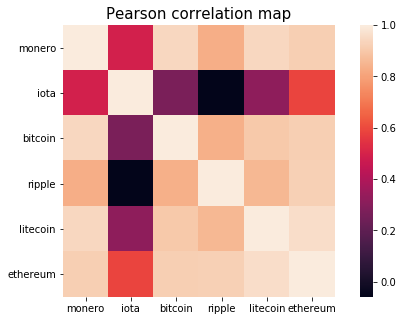

,monero,iota,bitcoin,ripple,litecoin,ethereum
monero,1.000000,0.494532,0.945622,0.833508,0.945625,0.917477
iota,0.494532,1.000000,0.269438,-0.058567,0.320551,0.589040
bitcoin,0.945622,0.269438,1.000000,0.835094,0.904051,0.918092
ripple,0.833508,-0.058567,0.835094,1.000000,0.855779,0.924108
litecoin,0.945625,0.320551,0.904051,0.855779,1.000000,0.962553
ethereum,0.917477,0.589040,0.918092,0.924108,0.962553,1.000000


In [20]:
df = pd.DataFrame() 
currency_name = []
df['Date'] = currency_dict['bitcoin'].Date 
df = df[df['Date']>'2017-05-01']
for currency in currency_dict:
    currency_name.append(currency)
    temp_df = currency_dict[currency]
    df[currency] = temp_df[temp_df['Date']>'2017-05-01'].Close

temp_df = df[currency_name]
corrmat = temp_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(9, 5))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Pearson correlation map", fontsize=15)
plt.show()
temp_df.corr(method='pearson')

# Data Preprocessing

##### Converting the date column from string to Datetime format for further processing. Finding correlation between different features and removing the highly correlated features. Removing stationarity by taking log transformation of data for some algorithms


In [21]:
bitcoin_price.loc[0:, 'Date'] = pd.to_datetime(bitcoin_price['Date'])

In [22]:
bitcoin_price = bitcoin_price.set_index('Date')

In [23]:
bitcoin_price.head(5)

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-11-07,7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
2017-11-06,7403.22,7445.77,7007.31,7022.76,"3,111,900,000","123,379,000,000"
2017-11-05,7404.52,7617.48,7333.19,7407.41,"2,380,410,000","123,388,000,000"
2017-11-04,7164.48,7492.86,7031.28,7379.95,"2,483,800,000","119,376,000,000"
2017-11-03,7087.53,7461.29,7002.94,7207.76,"3,369,860,000","118,084,000,000"


In [24]:
#correlation between different features
corrmat = bitcoin_price.corr(method='spearman')

In [25]:
corrmat

,Open,High,Low,Close
Open,1.000000,0.998521,0.998032,0.997596
High,0.998521,1.000000,0.996769,0.998676
Low,0.998032,0.996769,1.000000,0.998472
Close,0.997596,0.998676,0.998472,1.000000


#### As the features are highly correlated, we can just choose any one feature (we chose "Close") to predict.

In [26]:
#final dataset
bitcoin_final = bitcoin_price['Close']

In [27]:
bitcoin_final.head(5)

Date
2017-11-07    7144.38
2017-11-06    7022.76
2017-11-05    7407.41
2017-11-04    7379.95
2017-11-03    7207.76
Name: Close, dtype: float64

In [28]:
def remove_missing_data(data):
    return data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [29]:
def preprocess(data):
    data = remove_missing_data(data)
    data.loc[0:, 'Date'] = pd.to_datetime(data['Date'])
    data = data.set_index('Date')
    return data

# Data Modelling

In [30]:
#splitting the data into test and train
def split_data(data):
    splitIndex = int(np.floor(data.shape[0]*0.90))
    trainDataset, testDataset = data[:splitIndex], data[splitIndex:]
    return (trainDataset, testDataset)

## Support Vector Regressor

/Users/masi/.pyenv/versions/DL/lib/python3.5/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE using Support Vector Regressor:  271340.112446


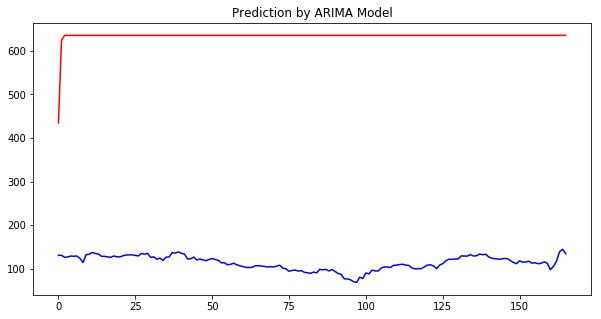

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import time
import datetime

x = preprocess(currency_dict['bitcoin'])
x['Date'] = x.index
x.Close = np.log(x.Close)
x.Date = x.Date.apply(lambda dt_time:10000*dt_time.year + 1000*dt_time.month + dt_time.day).astype(int)
x
train, test = split_data(x)

x_t = train.Date.values.reshape(-1,1)
y_t = train.Close.values.reshape(-1, 1)

x_te = test.Date.values.reshape(-1,1)
y_te = test.Close.values.reshape(-1, 1)

# x.columns = ['Close']
# regr = LinearRegression()
clf = SVR(C=1.0, epsilon=0.2)
clf.fit(x_t, y_t) 

predictions = clf.predict(x_te)
predictions = np.exp(predictions)
y_te = np.exp(y_te)

mse = mean_squared_error(y_te, predictions)
print ("MSE using Support Vector Regressor: ", mse)
plt.plot(y_te, color='blue')
plt.plot(predictions, color='red')
plt.title("Prediction by ARIMA Model")
plt.show()


## Long-Short Term Memory Recurrent Neural Network

In [32]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' #Hide messy TensorFlow warnings
warnings.filterwarnings("ignore") #Hide messy Numpy warnings

def load_data(filename, seq_len, normalise_window):
    f = open(filename, 'rb').read()
    data = f.decode().split('\n')

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    if normalise_window:
        result = normalise_windows(result)

    result = np.array(result)

    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

def normalise_windows(window_data):
    normalised_data = []
    for window in window_data:
        normalised_window = [((float(p) / float(window[0])) - 1) for p in window]
        normalised_data.append(normalised_window)
    return normalised_data

def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[3]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop")
    print("> Compilation Time : ", time.time() - start)
    return model

def predict_point_by_point(model, data):
    #Predict each timestep given the last sequence of true data, in effect only predicting 1 step ahead each time
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted

def predict_sequence_full(model, data, window_size):
    #Shift the window by 1 new prediction each time, re-run predictions on new window
    curr_frame = data[0]
    predicted = []
    for i in range(len(data)):
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[1:]
        curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
    return predicted

def predict_sequences_multiple(model, data, window_size, prediction_len):
    #Predict sequence of 50 steps before shifting prediction run forward by 50 steps
    prediction_seqs = []
    for i in range(int(len(data)/prediction_len)):
        curr_frame = data[i*prediction_len]
        predicted = []
        for j in range(prediction_len):
            predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
            curr_frame = curr_frame[1:]
            curr_frame = np.insert(curr_frame, [window_size-1], predicted[-1], axis=0)
        prediction_seqs.append(predicted)
    return prediction_seqs

def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()

def plot_results_multiple(predicted_data, true_data, prediction_len):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    #Pad the list of predictions to shift it in the graph to it's correct start
    for i, data in enumerate(predicted_data):
        padding = [None for p in range(i * prediction_len)]
        plt.plot(padding + data, label='Prediction')
        plt.legend()
    plt.show()

In [33]:
data = bitcoin_final
data.to_csv(path='prices.csv',  sep=',',header=None, index=False)

> Loading data... 
> Data Loaded. Compiling...
> Compilation Time :  0.03296089172363281
Train on 1406 samples, validate on 74 samples
Epoch 1/20
1406/1406 [==============================] - 2s - loss: 0.0149 - val_loss: 0.0083
Epoch 2/20
1406/1406 [==============================] - 0s - loss: 0.0083 - val_loss: 0.0075
Epoch 3/20
1406/1406 [==============================] - 0s - loss: 0.0087 - val_loss: 0.0069
Epoch 4/20
1406/1406 [==============================] - 0s - loss: 0.0060 - val_loss: 0.0069
Epoch 5/20
1406/1406 [==============================] - 0s - loss: 0.0056 - val_loss: 0.0068
Epoch 6/20
1406/1406 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0065
Epoch 7/20
1406/1406 [==============================] - 0s - loss: 0.0052 - val_loss: 0.0062
Epoch 8/20
1406/1406 [==============================] - 0s - loss: 0.0051 - val_loss: 0.0060
Epoch 9/20
1406/1406 [==============================] - 0s - loss: 0.0048 - val_loss: 0.0057
Epoch 10/20
1406/1406 [=====

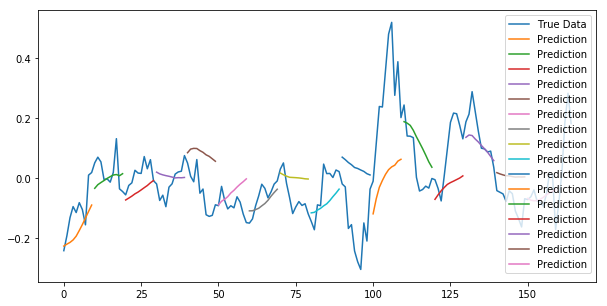

Results for full sequence prediction


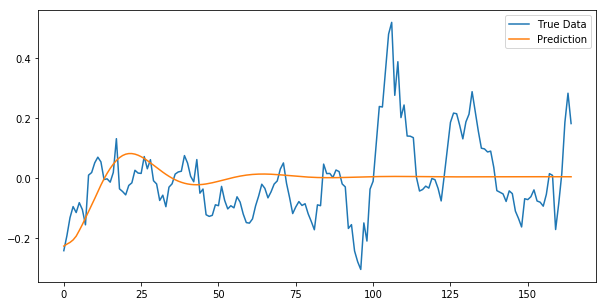

Results for point by point prediction


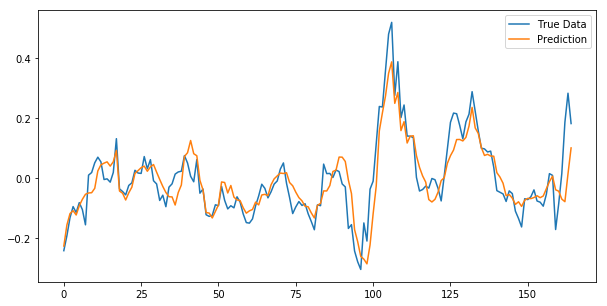

> Loading data... 
> Data Loaded. Compiling...
> Compilation Time :  0.03319096565246582
Train on 1402 samples, validate on 74 samples
Epoch 1/20
1402/1402 [==============================] - 2s - loss: 0.0226 - val_loss: 0.0142
Epoch 2/20
1402/1402 [==============================] - 0s - loss: 0.0121 - val_loss: 0.0073
Epoch 3/20
1402/1402 [==============================] - 0s - loss: 0.0083 - val_loss: 0.0067
Epoch 4/20
1402/1402 [==============================] - 0s - loss: 0.0072 - val_loss: 0.0052
Epoch 5/20
1402/1402 [==============================] - 0s - loss: 0.0068 - val_loss: 0.0050
Epoch 6/20
1402/1402 [==============================] - 0s - loss: 0.0065 - val_loss: 0.0050
Epoch 7/20
1402/1402 [==============================] - 0s - loss: 0.0061 - val_loss: 0.0044
Epoch 8/20
1402/1402 [==============================] - 0s - loss: 0.0062 - val_loss: 0.0042
Epoch 9/20
1402/1402 [==============================] - 0s - loss: 0.0057 - val_loss: 0.0043
Epoch 10/20
1402/1402 [=====

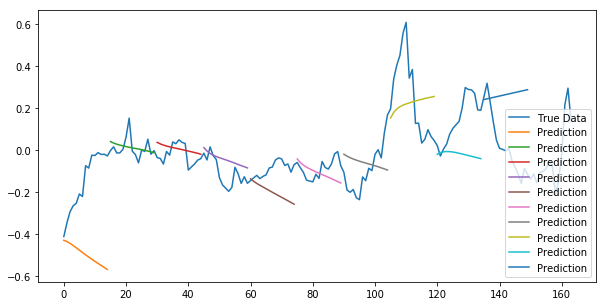

Results for full sequence prediction


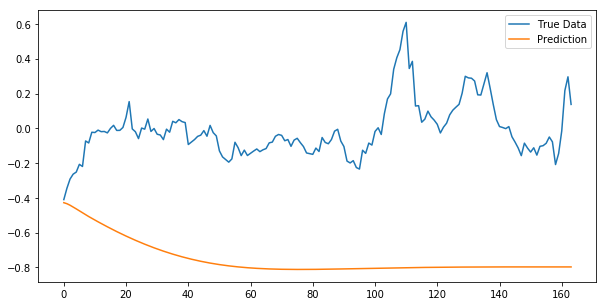

Results for point by point prediction


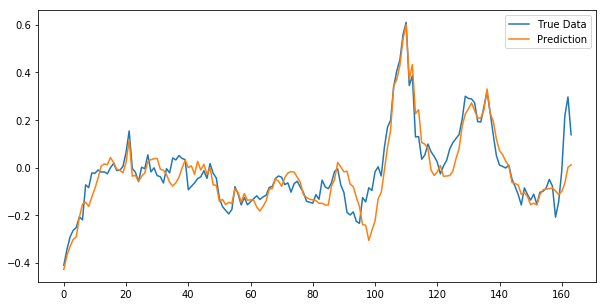

> Loading data... 
> Data Loaded. Compiling...
> Compilation Time :  0.03432607650756836
Train on 1371 samples, validate on 73 samples
Epoch 1/20
1371/1371 [==============================] - 4s - loss: 0.0545 - val_loss: 0.0123
Epoch 2/20
1371/1371 [==============================] - 2s - loss: 0.0170 - val_loss: 0.0091
Epoch 3/20
1371/1371 [==============================] - 2s - loss: 0.0111 - val_loss: 0.0071
Epoch 4/20
1371/1371 [==============================] - 2s - loss: 0.0099 - val_loss: 0.0063
Epoch 5/20
1371/1371 [==============================] - 2s - loss: 0.0089 - val_loss: 0.0060
Epoch 6/20
1371/1371 [==============================] - 2s - loss: 0.0093 - val_loss: 0.0067
Epoch 7/20
1371/1371 [==============================] - 1s - loss: 0.0099 - val_loss: 0.0047
Epoch 8/20
1371/1371 [==============================] - 2s - loss: 0.0075 - val_loss: 0.0042
Epoch 9/20
1371/1371 [==============================] - 2s - loss: 0.0070 - val_loss: 0.0043
Epoch 10/20
1371/1371 [=====

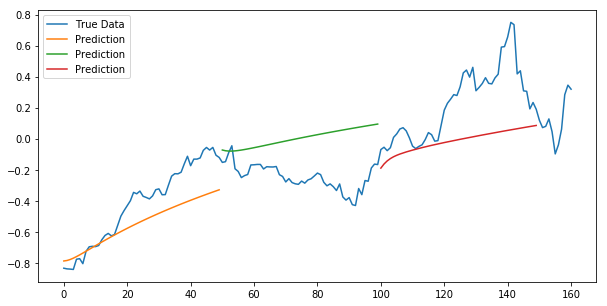

Results for full sequence prediction


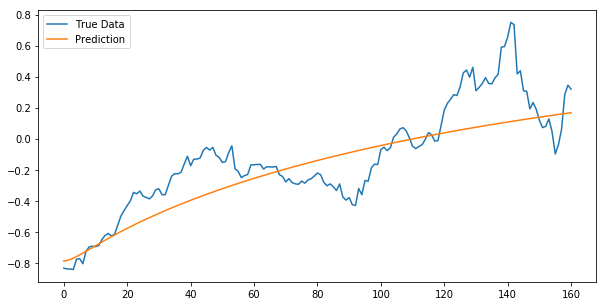

Results for point by point prediction


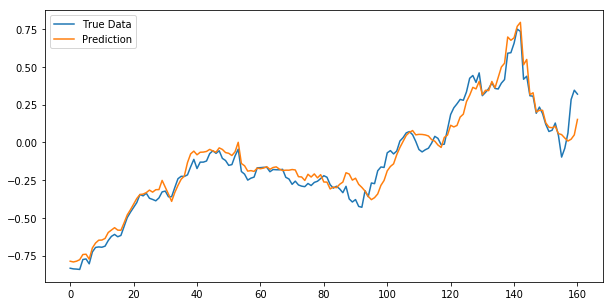

In [35]:
global_start_time = time.time()
epochs = 20
seq_len = [10, 15, 50]
prediction_len = [10, 15, 50]

for l in seq_len:
    print('> Loading data... ')
    X_train, y_train, X_test, y_test = load_data('prices.csv', l, True)

    print('> Data Loaded. Compiling...')
    model = build_model([1, 50, 100, 1])

    model.fit(
        X_train,
        y_train,
        batch_size=512,
        nb_epoch=epochs,
        validation_split=0.05)
    
    predicted_sequences_multiple = predict_sequences_multiple(model, X_test, l, l)
    predicted_sequence_full = predict_sequence_full(model, X_test, l)
    predicted_point_by_point = predict_point_by_point(model, X_test) 
    
    print('Training duration (s) : ', time.time() - global_start_time)
    #     plot_results_multiple(predictions, y_test, 1)
    # MSE_bitcoin_sequences_multiple = mean_squared_error(y_test, predicted_sequences_multiple)
    MSE_bitcoin_sequence_full = mean_squared_error(y_test, predicted_sequence_full)
    MSE_bitcoin_point_by_point = mean_squared_error(y_test, predicted_point_by_point)
    # print("MSE for Bitcoin Multiple Sequence LSTM model: ", MSE_bitcoin_sequences_multiple)
    print("MSE for Bitcoin Full Sequence LSTM model: ", MSE_bitcoin_sequence_full)
    print("MSE for Bitcoin Point-by-Point LSTM model: ", MSE_bitcoin_point_by_point)

    print("Results for multiple sequence prediction")
    plot_results_multiple(predicted_sequences_multiple, y_test, l)
    print("Results for full sequence prediction")
    plot_results(predicted_sequence_full, y_test)
    print("Results for point by point prediction")
    plot_results(predicted_point_by_point, y_test)

## FB Prophet

In [36]:
from fbprophet import Prophet

In [37]:
dataProphet = currency_dict['ethereum']
dataProphet = dataProphet.reset_index()

In [38]:
dataProphetRed = dataProphet[['Date', 'Close']]

In [39]:
dataProphetRed = dataProphetRed.rename(columns={"Date": "ds", "Close": "y"})

In [40]:
dataProphetRed.head(5)

,ds,y
0,"Nov 07, 2017",294.66
1,"Nov 06, 2017",298.89
2,"Nov 05, 2017",296.26
3,"Nov 04, 2017",300.47
4,"Nov 03, 2017",305.71


In [41]:
dataProphetRed['y_orig'] = dataProphetRed['y'] # to save a copy of the original data

In [42]:
#log transform y
dataProphetRed['y'] = np.log(dataProphetRed['y'])

In [43]:
dataProphetRed.head(5)

,ds,y,y_orig
0,"Nov 07, 2017",5.685822,294.66
1,"Nov 06, 2017",5.700076,298.89
2,"Nov 05, 2017",5.691237,296.26
3,"Nov 04, 2017",5.705348,300.47
4,"Nov 03, 2017",5.722637,305.71


In [44]:
splitIndex = int(np.floor(dataProphetRed.shape[0]*0.90))
X_train_prophet, X_test_prophet = dataProphetRed[:splitIndex], dataProphetRed[splitIndex:]
print ("No. of samples in the training set: ", len(X_train_prophet))
print ("No. of samples in the test set", len(X_test_prophet))

No. of samples in the training set:  741
No. of samples in the test set 83


In [45]:
model=Prophet(daily_seasonality=True)
# model.fit(dataProphetRed)
model.fit(X_train_prophet)

In [46]:
future_data = model.make_future_dataframe(periods=30)

In [47]:
forecast_data = model.predict(future_data)

In [48]:
forecast_data.head(5)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,daily,daily_lower,daily_upper,seasonal,...,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2015-10-29,0.181232,0.181232,0.181232,-0.205645,0.089511,-0.034096,-0.034096,-0.034096,-0.238726,...,-0.238726,-0.238726,-0.238726,0.006060,0.006060,0.006060,-0.210690,-0.210690,-0.210690,-0.057494
1,2015-10-30,0.193590,0.193590,0.193590,-0.210450,0.078940,-0.034096,-0.034096,-0.034096,-0.254521,...,-0.254521,-0.254521,-0.254521,0.001169,0.001169,0.001169,-0.221594,-0.221594,-0.221594,-0.060931
2,2015-10-31,0.205949,0.205949,0.205949,-0.215350,0.078004,-0.034096,-0.034096,-0.034096,-0.271591,...,-0.271591,-0.271591,-0.271591,-0.004985,-0.004985,-0.004985,-0.232510,-0.232510,-0.232510,-0.065642
3,2015-11-01,0.218307,0.218307,0.218307,-0.188132,0.070545,-0.034096,-0.034096,-0.034096,-0.279879,...,-0.279879,-0.279879,-0.279879,-0.002306,-0.002306,-0.002306,-0.243477,-0.243477,-0.243477,-0.061572
4,2015-11-02,0.230666,0.230666,0.230666,-0.201567,0.088973,-0.034096,-0.034096,-0.034096,-0.290571,...,-0.290571,-0.290571,-0.290571,-0.001932,-0.001932,-0.001932,-0.254543,-0.254543,-0.254543,-0.059905


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test = X_test_prophet

In [50]:
del test['y_orig']

In [51]:
test.set_index('ds')

,y
ds,
"Oct 28, 2015",0.000000
"Oct 27, 2015",-0.139675
"Oct 26, 2015",-0.312908
"Oct 25, 2015",-0.484445
"Oct 24, 2015",-0.573428
"Oct 23, 2015",-0.616822
"Oct 22, 2015",-0.566159
"Oct 21, 2015",-0.804461
"Oct 20, 2015",-0.832802


In [52]:
test1 = model.predict(test)

In [53]:
MSE = mean_squared_error(np.exp(test['y']), np.exp(test1['yhat']))
print ("Mean Squared Error: ", MSE)

Mean Squared Error:  0.134063177283


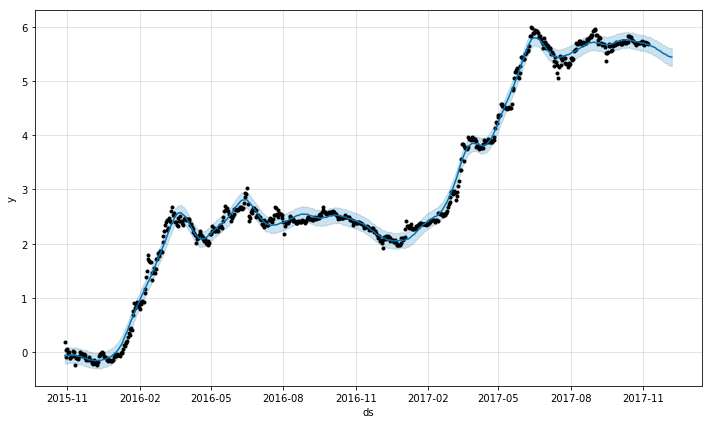

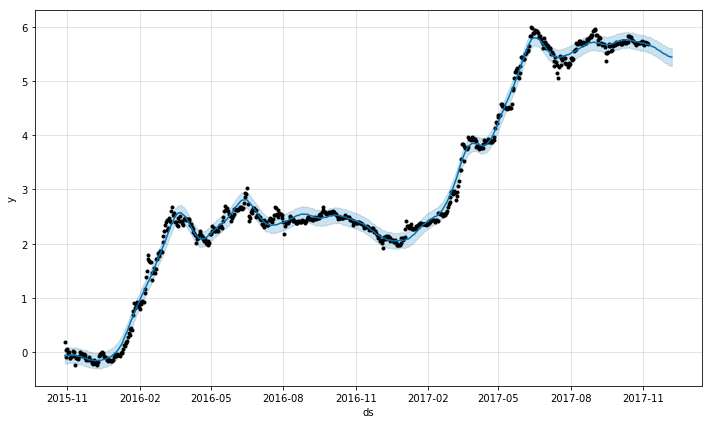

In [54]:
model.plot(forecast_data)

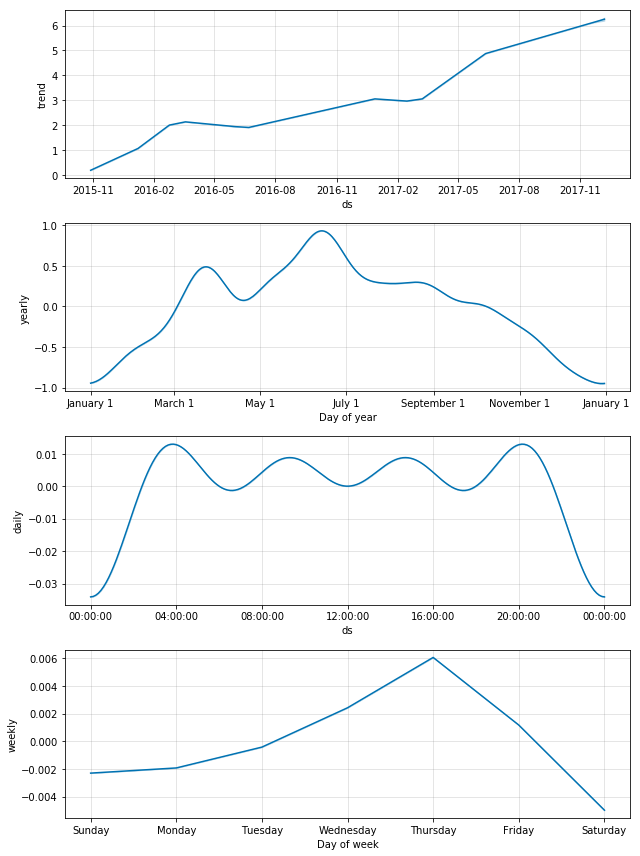

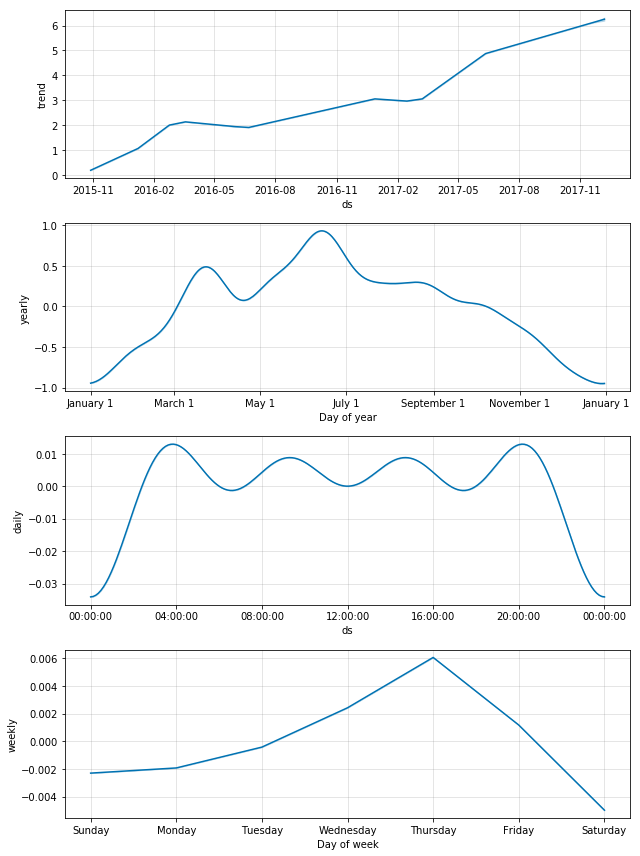

In [55]:
model.plot_components(forecast_data)

In [56]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
def fbProphet(data):
    dataProphet = data
    dataProphet = dataProphet.reset_index()
    dataProphetRed = dataProphet[['Date', 'Close']]
    dataProphetRed = dataProphetRed.rename(columns={"Date": "ds", "Close": "y"})
    dataProphetRed['y_orig'] = dataProphetRed['y'] # to save a copy of the original data
    #log transform y
    dataProphetRed['y'] = np.log(dataProphetRed['y'])
    splitIndex = int(np.floor(dataProphetRed.shape[0]*0.90))
    X_train_prophet, X_test_prophet = dataProphetRed[:splitIndex], dataProphetRed[splitIndex:]
    model=Prophet(yearly_seasonality=True, daily_seasonality=True)
    # model.fit(dataProphetRed)
    model.fit(X_train_prophet)
    test = X_test_prophet
    del test['y_orig']
    test.set_index('ds')
    prediction = model.predict(test)
    MSE = mean_squared_error(np.exp(test['y']), np.exp(prediction['yhat']))
    return MSE

In [57]:
for currency in currency_dict:
    mse = fbProphet(currency_data[currency])
    print ("MSE using FB Prophet for " + currency + " :", mse)

MSE using FB Prophet for monero : 0.915183435877
MSE using FB Prophet for iota : 0.0339033544037
MSE using FB Prophet for bitcoin : 9657.20382839
MSE using FB Prophet for ripple : 0.0147605224748
MSE using FB Prophet for litecoin : 5.35546442707
MSE using FB Prophet for ethereum : 0.134063177283


## ARIMA Model

In [58]:
bitcoinDemo = currency_dict['bitcoin']
bitcoinDemoData = preprocess(bitcoinDemo)
bitcoinDemoData = bitcoinDemoData['Close']
X_train_arima, X_test_arima = split_data(bitcoinDemoData)

In [59]:
model = ARIMA(X_train_arima, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1488
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -8317.586
Method:                       css-mle   S.D. of innovations             64.770
Date:                Mon, 27 Nov 2017   AIC                          16643.172
Time:                        15:33:54   BIC                          16664.393
Sample:                    11-06-2017   HQIC                         16651.081
                         - 10-11-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.7055      1.769     -2.660      0.008      -8.172      -1.239
ar.L1.D.Close     0.0068      0.026      0.261      0.794      -0.044       0.058
ar.L2.D.Close     0.0441      0.026     

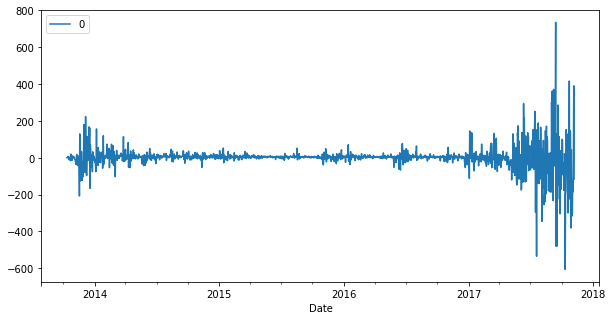

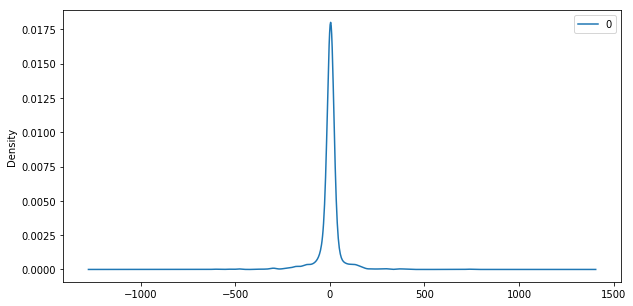

                 0
count  1488.000000
mean     -0.007375
std      64.793010
min    -606.474144
25%      -5.047708
50%       3.652189
75%       9.374548
max     734.816066


In [60]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 22.086


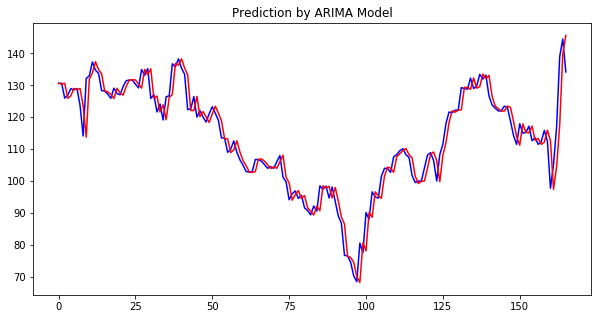

In [61]:
train = X_train_arima.values
test = X_test_arima.values
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(trend='nc', disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test, color='blue')
plt.plot(predictions, color='red')
plt.title("Prediction by ARIMA Model")
plt.show()

In [62]:
def arima(data):
    X_train_arima, X_test_arima = split_data(data)
    train = X_train_arima.values
    test = X_test_arima.values
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(2,1,0))
        model_fit = model.fit(trend='nc', disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    mse = mean_squared_error(test, predictions)
    return mse

for currency in currency_dict:
    data = preprocess(currency_data[currency])
    data = data['Close']
    mse = arima(data)
    print ("MSE using ARIMA for " + currency + " :", mse) 

MSE using ARIMA for monero : 0.0958123928306
MSE using ARIMA for iota : 0.00310227605162
MSE using ARIMA for bitcoin : 22.0861647539
MSE using ARIMA for ripple : 7.80613442773e-06
MSE using ARIMA for litecoin : 0.0183038596409
MSE using ARIMA for ethereum : 0.0622460439302
